# Deep Learning

## 1. Packages

* numpy is the fundamental package for scientific computation with Python.
* matplotlib is a robust library for generating graphs in Python.

In [1]:
# Importing libraries
# Python imports
# Allow matplotlib to plot inside this notebook
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Print versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.0
numpy: 1.15.1
matplotlib: 2.2.3


## 2. Dataset

### Config Dataset

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((D,N*K))
y = np.zeros((1,N*K), dtype='uint8')
X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [3]:
print(X.shape)

(2, 200)


In [4]:
print(y.shape)

(1, 200)


### Visualize Dataset

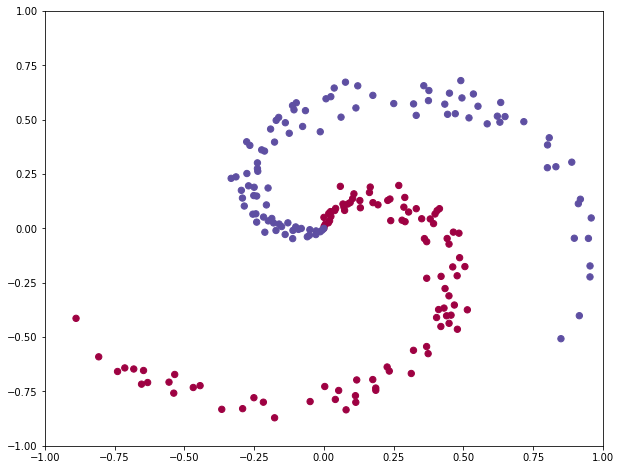

In [5]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'

np.random.seed(0)

# Generating the datast
for jj in range(K):
    ix = range(N*jj, N*(jj+1))
    rad = np.linspace(0.0,1,N) # radius
    th = np.linspace(jj*4, (jj+1)*4, N) + np.random.randn(N)*0.2 # theta
    out = np.transpose(np.c_[rad*np.sin(th), rad*np.cos(th)])
    X[:, ix] = out
    y[:, ix] = jj
    
fig = plt.figure()
plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
fig.savefig('spiral_dataset.png')

In [6]:
X.shape

(2, 200)

In [69]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)

## 3 - General Architecture of the learning algorithm ##

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.


### 4.1 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation

In [8]:
def initialize_with_zeros(D, K):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (D, K)
    b -- initialized scalar (corresponds to the bias) of size K
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    W = np.zeros((D,K)) #wt*X
    b = np.zeros((K,1))
    
    ### END CODE HERE ###
    
    return W, b

In [9]:
W_debug, b_debug = initialize_with_zeros(D, K)
print ("W = " + str(W_debug))
print ("b = " + str(b_debug))

W = [[0. 0.]
 [0. 0.]]
b = [[0.]
 [0.]]


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.  0.] </td>
    <tr>
        <td colspan=2>
 [ 0.  0.]] 
        </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> [[ 0.] </td>
    <tr>
        <td colspan=2>    [ 0.]]  </td>
    </tr>
</table>


In [10]:
def initialize_randomly(D, K):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (D, K)
    b -- initialized scalar (corresponds to the bias) of size K
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    W = np.random.rand(D,K)
    b = np.random.rand(K,1)
    ### END CODE HERE ###
    
    return W, b

In [11]:
def initialize_he(D, K):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    W -- initialized vector of shape (D, K)
    b -- initialized scalar (corresponds to the bias) of size K
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    W = np.random.rand(D,K)
    b = np.random.rand(K,1)
    W=np.square(2/K)*W
    
    ### END CODE HERE ###
    
    return W, b

In [12]:
def initialize_params(D, K, init_type='zeros'):
    if init_type == 'zeros':
        print('zero-based init')
        return initialize_with_zeros(D, K)
    elif init_type == 'random':
        print('random-based init')
        return initialize_randomly(D, K)
    elif init_type == 'he':
        print('he-based init')
        return initialize_he(D, K)

### 4.2 - Activation Functions

Sigmoid Function: it takes a real-valued number and “squashes” it into range between 0 and 1. In particular, large negative numbers become 0 and large positive numbers become 1. The sigmoid function has seen frequent use historically since it has a nice interpretation as the firing rate of a neuron: from not firing at all (0) to fully-saturated firing at an assumed maximum frequency (1).

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [13]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s=1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [14]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

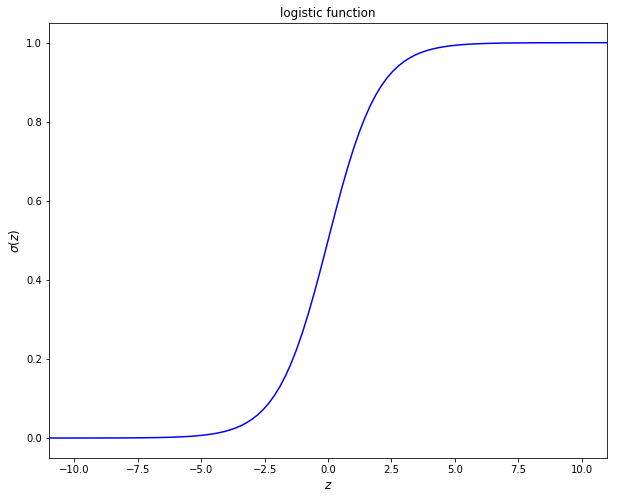

In [15]:
# Plot the logistic function
xval=11
no_samp=100
z = np.linspace(-xval, xval, no_samp)
plt.plot(z, sigmoid(z), 'b-')
plt.xlabel('$z$', fontsize=12)
plt.ylabel('$\sigma(z)$', fontsize=12)
plt.title('logistic function')
plt.xlim(-xval, xval)
plt.show()
#

In [16]:
def sigmoid_deriv(z):
    """
    Compute the derivative of the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid_deriv(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)

    s=sigmoid(z)*(1-sigmoid(z))
    ### END CODE HERE ###
    
    return s

### 4.3 - Cost Function
We’ll use cross-entropy for our cost function. The formula for a single training example is:
    
$$
L(y, \hat{y}) = -y \log(\hat{y}) - (1-y) \log(1-\hat{y})
$$

Averaging over a training set of $𝑚$ examples we then have:
    
$$
L(Y, \hat{Y}) = -\frac{1}{m} \sum_{i=1}^m \left( y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)}) \right)
$$

In [17]:
def compute_cost(Y, Y_hat):
    m=Y.shape[1]
    ### START CODE HERE ### (≈ 2 lines of code)
    #L=(-1/m)*np.sum(np.dot(np.transpose(Y),np.log(Y_hat))+np.dot(np.transpose(1-Y),np.log(1-Y_hat)))
    L=(-1/m)*np.sum(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat))
    ### END CODE HERE ###
    return L

In [50]:
y_hat = np.random.rand(1,200)
y_hat.shape
#y_hat.reshape(1,200)
mm=y*(np.log(y_hat))
mm.shape
#y
compute_cost(y,y_hat)


1.0716276177399686

### 4.4 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.


For backpropagation, we will need to know how $𝐿$ changes with respect to each component $w_j$ of $w$. That is, we must compute each $\partial L / \partial w_j$

\begin{align}
  z &= w^T x + b,\newline
  \hat{y} &= \sigma(z),\newline
  L(y, \hat{y}) &= -y \log(\hat{y}) - (1-y) \log(1-\hat{y})
\end{align}

And the chain rule tells us:

$$
\frac{\partial L}{\partial w_j} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z} \frac{\partial z}{\partial w_j}
$$

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \hat{y} = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [57]:
def propagate(W, b, X, y, use_reg=False, reg_lambda=0.01):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dW -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A= sigmoid(np.dot(np.transpose(W),X)+b)
    cost= compute_cost(y,A)
    ### END CODE HERE ###
    
    if use_reg:
        ### START CODE HERE ### (≈ 2 lines of code)

        cost=cost+(reg_lambda/2)*np.sum(np.square(W))
        ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dW = (1/m)*np.dot(X,np.transpose(A-y))
    db = (1/m)*np.sum(A-y)
    ### END CODE HERE ###
    
    if use_reg:
        ### START CODE HERE ### (≈ 2 lines of code)
        dW = dW+reg_lambda*np.sum(W)
        ### END CODE HERE ###

    assert(dW.shape == W.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dW": dW,
             "db": db}
    
    return grads, cost

In [56]:
W_debug, b_debug, X_debug, y_debug = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
y_debug.shape
grads, cost = propagate(W_debug, b_debug, X_debug, y_debug)
print ("dW = " + str(grads["dW"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dW = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [58]:
def optimize(W, b, X, y, num_iterations, learning_rate, use_reg = False, reg_lambda = 0.01, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    use_reg -- use regularization
    reg_lambda -- regularization weight
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for ii in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(W, b, X, y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dW = grads["dW"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        W = W-learning_rate*dW
        
        ### END CODE HERE ###
        
        # Record the costs
        if ii % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 200 training iterations
        if print_cost and ii % 200 == 0:
            print ("Cost after iteration %i: %f" %(ii, cost))
    
    params = {"W": W,
              "b": b}
    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

In [59]:
params, grads, costs = optimize(W_debug, b_debug, X_debug, y_debug, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("W = " + str(params["W"]))
print ("b = " + str(params["b"]))
print ("dW = " + str(grads["dW"]))
print ("db = " + str(grads["db"]))

W = [[0.19085485]
 [0.124599  ]]
b = 2.0
dW = [[0.67832892]
 [1.41526805]]
db = 0.22590636101205677


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591]
 [ 0.12259159]] </td>
    </tr>
    
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>

</table>

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [60]:
def predict(W, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
   
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(np.transpose(W),X)+b)
    ### END CODE HERE ###
    
    for ii in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0][ii]>=0.5:
            Y_prediction[0][ii]=1
        
        
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [61]:
W_debug = np.array([[0.1124579],[0.23106775]])
b_debug = -0.3
X_debug = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(W_debug, b_debug, X_debug)))

predictions = [[1. 1. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [64]:
def train(X_train, y_train, K=2, num_iterations=2000, learning_rate=0.5, use_reg=False, reg_lambda=0.01, init_type='zeros', print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    
    # initialize parameters with zeros (≈ 1 line of code)
    ### START CODE HERE ### (≈ 1 line of code)
    W_i,b_i = initialize_with_zeros(D, K)
    #initialize_randomly(D, K)
    ### END CODE HERE ###

    # Gradient descent (≈ 1 line of code)
    ### START CODE HERE ### (≈ 1 line of code)
    parameters, grads, costs = optimize(W_i, b_i, X_train, y_train, num_iterations, learning_rate, print_cost)
    ### END CODE HERE ###
        
    # Retrieve parameters w and b from dictionary "parameters"
    W = parameters["W"]
    b = parameters["b"]
    
    Y_prediction_train = predict(W, b, X)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    
    d = {"costs": costs,
         "W" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [67]:
# train model here (≈ 1 line of code), e.g. with learning_rate = 0.05
### START CODE HERE ### (≈ 1 line of code)
d =  train(X, y,2, 2000, 0.05,False, 0.01,'zeros', False)
### END CODE HERE ###

train accuracy: 72.5 %


**Expected Output**: 

<table style="width:40%"> 

    <tr>
        <td> **Cost after iteration 0 **  </td> 
        <td> 1.386294 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 72.5 % </td>
    </tr>
    
</table> 

In [ ]:
W = d['W']
b = d['b']
plt.title("Decision Boundary for simple NN")
# plot decision boundary here (≈ 1 line of code)
plot_decision_boundary(model, X, y)

## 6 - Further Analysis

### 6.1 - Choice of learning rate

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

In [ ]:
learning_rates = [0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
models = {}
for lr in learning_rates:
    print ("learning rate is: " + str(lr))
    # train model here with different learning rates (≈ 1 line of code)
    models[str(lr)] = ...
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label= str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### 6.2 - Regularization

In [ ]:
# train model here using regularization (≈ 1 line of code)
d = ...

**Expected Output**: 

<table style="width:40%"> 

    <tr>
        <td> **Cost after iteration 0 **  </td> 
        <td> 1.386294 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 73 % </td>
    </tr>
    
</table> 

In [ ]:
W = d['W']
b = d['b']
plt.title("Decision Boundary for simple NN")
# plot decision boundary here (≈ 1 line of code)
...

In [ ]:
# train model here with different weight's initialization, e.g. 'he/random' (≈ 1 line of code)
d =  ...

In [ ]:
W = d['W']
b = d['b']
plt.title("Decision Boundary for simple NN")
# plot decision boundary here (≈ 1 line of code)
...

### 6.3 - Learning Rates

In [ ]:
plt.figure(figsize=(16, 32))
epsilon_steps = [1.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]
for ii, epsilon_st in enumerate(epsilon_steps):
    plt.subplot(5, 2, ii+1)
    plt.title('Epsilon value %2.4f' % epsilon_st)
    # train model here with different learning rates (≈ 1 line of code)
    model = ...
    W = model['W']
    b = model['b']
    # plot decision boundary here (≈ 1 line of code)
    ...
plt.show()